# ASSIGNMENT 3

### Mengolah dataset dan mengaplikasikan model Machine Learning


# DATA SET INFORMATION

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# ATTRIBUTE INFORMATION

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Langkah pertama - Import Libraries yang dibutuhkan

In [1]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

%matplotlib inline

# Data Loading

## Data set yang akan digunakan adalah bank additional dengan ekstensi xlsx

In [2]:
df_bank = pd.read_excel('bank-additional-full.xlsx')
test_df_bank = pd.read_excel('bank-additional.xlsx')
print('Data sets loaded and OK !!')

Data sets loaded and OK !!


In [3]:
#cek head
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


## Mencari dimensi dataset

In [4]:
df_bank.shape

(41188, 21)

## Mencari info atribut dataset

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Lihat apakah ada missing values

In [6]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## ANALISIS

Berdasarkan pencarian missing values diatas belum ditemukan ada keanehan sejauh ini. Untuk sekarang mari kita buat daftar atribut berdasarkan tipenya

In [7]:
kategori_kolom = list(df_bank.select_dtypes(include=['object']))
kategori_kolom

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [8]:
numerik_kolom = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
numerik_kolom

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

### Melihat statistik dari kolom numerik yang telah dibuat

In [9]:
df_bank[numerik_kolom].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,85401.579955,-40.502600,3180.107207,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,26471.506796,4.628198,2086.690436,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000


### Melihat jumlah data berdasarkan label yes dan no

In [10]:
df_bank.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


pada setiap kelas, terdapat 36548 label no dan 4640 label yes

### Langkah selanjutnya sebelum menggunakan data untuk ML, kita harus memastikan tidak ada missing values baik pada kolom kategorikal ataupun numerik

> Pada kolom kategorikal ternyata digunakan missing values dengan label 'unknown', label ini perlu kita ganti dengan standar NaN

In [11]:
df_bank[df_bank[kategori_kolom] == 'unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [12]:
#ganti 6 barus teratas jadi Nan
df_bank[df_bank[kategori_kolom]=='unknown'] = np.nan

In [13]:
#cek ulang
df_bank[df_bank[kategori_kolom] == 'unknown'].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

### Lihat ada berapa jumlah unik kategori per kolom

In [14]:

print('Nama kolom')
for col in kategori_kolom:
    if df_bank[col].dtype=='object':
        print(col, df_bank[col].nunique())

Nama kolom
job 11
marital 3
education 7
default 2
housing 2
loan 2
contact 2
month 10
day_of_week 5
poutcome 3
y 2


## Melihat label unik di setiap kolom

In [15]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in kategori_kolom:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(df_bank[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' nan]
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' nan 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' nan]
Nilai unik untuk kolom  LOAN
['no' 'yes' nan]
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom  Y
['no' 'yes']


Melihat label diatas, untuk kolom kategorikal sudah tidak terdapat missing values.

### Selanjutnya adalah melihat apakah ada missing values yang tidak standar pada kategori numerikal

In [16]:
df_bank[numerik_kolom].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
1,57,149,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
2,37,226,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
3,40,151,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
4,56,307,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0


### Mari kita telisik label unik dari setiap kolom

In [17]:
# Mencetak semua nilai unik pada setiap atribut numerikal
for num_col in numerik_kolom:
    print("Nilai unik untuk kolom ", num_col.upper())
    print(df_bank[num_col].unique())
    print('='*30)

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[9.3994e+04 9.4465e+04 9.3918e+04 9.3444e+04 9.3798e+04 9.3200e+01
 9.2756e+04 9.2843e+04 9.3075e+04 9.2893e+04 9.2963e+04 9.2469e+04
 9.2201e+04 9.2379e+04 9.2431e+04 9.2649e+04 9.2

Melihat kolom PDAYS dan deskripsi dari UCI, disebutkan 999 adalah nilai jika belum pernah dihubungi, agar menjadi nilai yang lebih standar, mari kita ubah menjadi 0

In [18]:
df_bank.pdays.replace(999,0,inplace=True)

### ANALISIS

> Berdasarkan pengolahan data diatas, non standard missing value hanya ditemukan pada kolom kategorikal dan sudah diproses menjadi standar Nan, untuk kolom numerikal sendiri tidak ditemukan keanehan

> Selanjutnya missing values pada kolom kategorikal akan diisi dengan modus dari atribut X, dan missing values pada kolom numerikal akan diisi dengan median dari atribut Z

In [19]:
#pisahkan data kategorikal dan numerikal
#kategorikal
bank_df_kategorikal = df_bank[kategori_kolom]

#numerikal
bank_df_numerikal = df_bank[numerik_kolom]

### Menggunakan class imputer untuk mengisi nan 

In [20]:
# instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Implementasi imputer pada variabel kategorikal

In [21]:
#data training
imputer_categorical.fit(bank_df_kategorikal)

SimpleImputer(strategy='most_frequent')

In [22]:
bank_df_kategorikal = imputer_categorical.transform(bank_df_kategorikal)
#buat data frame hasil transform
bank_df_kategorikal = pd.DataFrame(bank_df_kategorikal, columns=kategori_kolom)

In [23]:
df_bank = pd.concat([bank_df_numerikal, bank_df_kategorikal], axis=1)

### Sekarang nilai Nan sudah terisi oleh class imputer, mari double check dataset

In [24]:
print('Nan di kategori ',df_bank[kategori_kolom].isnull().sum().sum())
print('Nan di numerikal ',df_bank[numerik_kolom].isnull().sum().sum())

Nan di kategori  0
Nan di numerikal  0


In [25]:
#tampiolkan head setelah imputasi
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


### rename kolom jadi bahasa Indonesia

In [26]:
df_bank.rename(columns={
    'job':'pekerjaan',
    'marital':'pernikahan',
    'education':'pendidikan',
    'default':'kredit_default',
    'housing':'pinjaman_rumah',
    'loan':'pinjaman_pribadi',
    'contact':'alat_komunikasi',
    'month':'kontak_terakhir_bulan',
    'day_of_week':'kontak_terakhir_hari',
    'poutcome':'luaran_marketing_sebelumnya',
    'y':'berlangganan_deposito',
    'age':'umur',
    'duration':'kontak_terakhir_berdurasi',
    'campaign':'jumlah_kontak_selama_pemasaran',
    'pdays':'jumlah_hari_berlalu',
    'previous':'jumlah_kontak_sebelum_pemasaran',
    'emp.var.rate':'tingkat_variasi_pekerjaan',
    'cons.price.idx':'indeks_harga_konsumen',
    'cons.conf.idx':'indeks_kepercayaan_konsumen',
    'euribor3m':'tarif_euribor_3bulan',
    'nr.employed':'jumlah_karyawan',
},inplace=True)

In [27]:
df_bank['berlangganan_deposito'].value_counts()

no     36548
yes     4640
Name: berlangganan_deposito, dtype: int64

### VISUALISASI - Melihat persentase rasio kategori status pernikahan terhadap berlangganan deposito

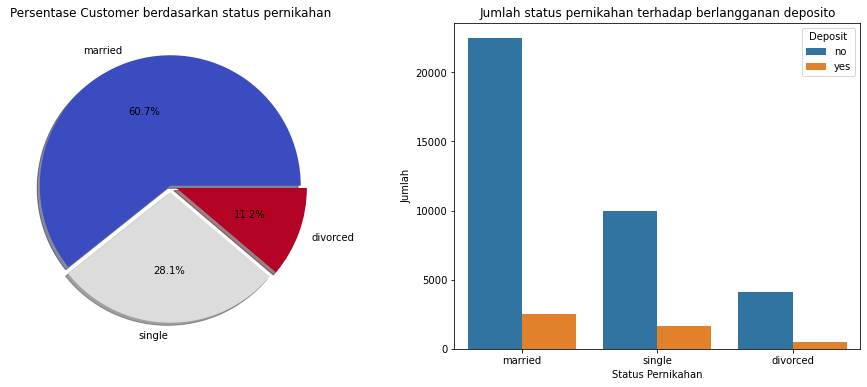

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "marital"
df_bank['pernikahan'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05,0.05], 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')

# Barchart besaran setiap status pernikahan terhadap setiap kelas target
sns.countplot(
    x='pernikahan',
    hue='berlangganan_deposito',
    data=df_bank
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

### ANALISIS
1. Berdasarkan plotting diatas didapatkan rasio customer bank mayoritas sudah menikah dan tidak berlangganan deposito

In [29]:
df_bank.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,...,pernikahan,pendidikan,kredit_default,pinjaman_rumah,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,kontak_terakhir_hari,luaran_marketing_sebelumnya,berlangganan_deposito
0,56,261,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


## Dataset sudah siap untuk digunakan lebih lanjut untuk modelling

pada modelling, **kita perlu memisahkan atribut kategori menjadi ordinal dan nominal.** Ordinal = ada tingkatan di tiap nilai (mememerlukan label encoding), Nominal = tiap nilai setara(memerlukan one hot encoding).

In [30]:
#kolom kategorikal
kategori_kolom

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Atribut nominal = job, education , contact, mont, day_of_week, poutcome

Atribut ordinal = marital, default, housing, loan, y

In [31]:
#declare ulang variabel kolom numerik dan kategori 
numerik_kolom = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
kategori_kolom = list(df_bank.select_dtypes(include=['object']))

In [32]:
nominal_kolom = ['pekerjaan', 'pendidikan', 'alat_komunikasi', 'kontak_terakhir_bulan', 'kontak_terakhir_hari', 'luaran_marketing_sebelumnya']
ordinal_kolom = [col for col in kategori_kolom if col not in nominal_kolom]

In [33]:
#one hot encoding atribut nominal
ohe_df_bank = pd.get_dummies(df_bank[nominal_kolom], columns=nominal_kolom, prefix= nominal_kolom)

In [34]:
#label encoding variable
le_bank_df = df_bank.loc[:,ordinal_kolom]
encoder = LabelEncoder()


In [35]:
for ord_col in ordinal_kolom:
    le_bank_df[ord_col] = encoder.fit_transform(le_bank_df[ord_col])

### concat hasil one hot encoding dan label encoder

In [36]:
df_bank_categorical_encoded = pd.concat([ohe_df_bank,le_bank_df], axis = 1)

In [37]:
df_bank_categorical_encoded.shape

(41188, 43)

In [38]:
df_bank_categorical_encoded.head()

,pekerjaan_admin.,pekerjaan_blue-collar,pekerjaan_entrepreneur,pekerjaan_housemaid,pekerjaan_management,pekerjaan_retired,pekerjaan_self-employed,pekerjaan_services,pekerjaan_student,pekerjaan_technician,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


## Menyatukan data numerikal dan kategorikal encoded

In [39]:
df_bank = pd.concat([df_bank[numerik_kolom], df_bank_categorical_encoded], axis = 1)

In [40]:
df_bank.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,56,261,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,0,0,0,1,0,1,0,0,0,0
1,57,149,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,0,0,0,1,0,1,0,0,0,0
2,37,226,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,0,0,0,1,0,1,0,1,0,0
3,40,151,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,0,0,0,1,0,1,0,0,0,0
4,56,307,1,0,0,1.1,93994.0,-36.4,4857.0,5191.0,...,0,0,0,1,0,1,0,0,1,0


# PEMBAGIAN DATASET UNTUK TRAINING DAN TESTING

Pisahkan atribut sebagai X dan target sebagai y


In [41]:
X = df_bank.drop('berlangganan_deposito', axis=1)
y=df_bank['berlangganan_deposito']

## Train Test Split dengan rasio 70 Train : 30 Test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Agar lebih terbayang, mari kita lihat dimensi dari setiap variabel untuk train dan test

In [43]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (28831, 52)
Dimensi target data latih =  (28831,)
Dimensi atribut data uji =  (12357, 52)
Dimensi target data uji =  (12357,)


# Normalisasi Data
Data perlu diolah oleh class standardscaler agar lebih uniform

In [44]:
standard_scaler=StandardScaler()
standard_scaler.fit(X_train)

#transform datanya dengan scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# Menerapkan PCA (Principal Component Analysis) pada data training

In [45]:
pca_ = PCA()
pca_.fit(X_train)
# mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*30)

# mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*30)

Nilai Eigen setiap Principal Component
[5.10505194e+00 2.73171281e+00 2.32805530e+00 2.11248445e+00
 1.99990046e+00 1.78198889e+00 1.73048042e+00 1.65308846e+00
 1.50328766e+00 1.47081246e+00 1.27300456e+00 1.26722844e+00
 1.25110950e+00 1.22041843e+00 1.20181992e+00 1.14938822e+00
 1.13380331e+00 1.10616119e+00 1.06372666e+00 1.05572868e+00
 1.04557223e+00 1.03891734e+00 1.03380180e+00 1.02233690e+00
 1.01233833e+00 1.00314658e+00 9.89390736e-01 9.85993100e-01
 9.71024433e-01 9.47224660e-01 9.35790801e-01 8.78942103e-01
 8.58617748e-01 7.90807023e-01 7.38526351e-01 7.13413748e-01
 6.15938710e-01 4.47130524e-01 4.35087842e-01 4.24471691e-01
 2.92635232e-01 2.42575422e-01 1.82814766e-01 1.45646880e-01
 6.78860719e-02 4.25209007e-02 4.94935122e-29 1.76635661e-29
 1.67631822e-29 1.45741153e-29 1.40165291e-29 1.06152779e-29]
Rasio Nilai Eigen setiap Principal Component
[9.81706706e-02 5.25311166e-02 4.47687413e-02 4.06232920e-02
 3.84582903e-02 3.42678284e-02 3.32773154e-02 3.17890601e-02


Plotting Ratio Nilai Eigen yang dihasilkan PCA terhadap data latih

In [46]:
# membuat dataframe untuk memplotting variance ratio yang dihasilkan PCA
pca_variance = pd.DataFrame(data=pca_.explained_variance_ratio_,columns=['PC Variance'])
pca_variance['pc_name'] = pd.Series(data=['PC-'+str(i+1) for i in range(0,X_train.shape[1])])
pca_variance = pca_variance.sort_values(by='PC Variance')

# Plotting variance ratio yang dijelaskan setiap component

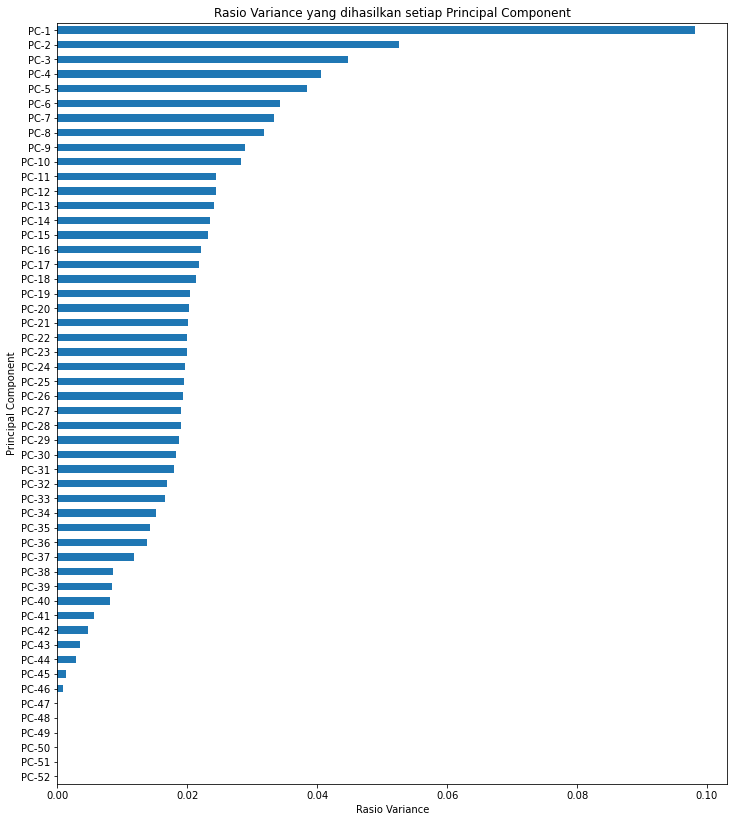

In [47]:

plt.figure(figsize=(12,14))
pca_variance['PC Variance'].plot(kind='barh')
plt.yticks(ticks=range(0,X_train.shape[1]), labels=pca_variance['pc_name'])
plt.title('Rasio Variance yang dihasilkan setiap Principal Component')
plt.xlabel('Rasio Variance')
plt.ylabel('Principal Component')
plt.show()

### Mencari jumlah principal component terbaik yang menghasilkan nilai eigen >= 1

In [48]:
# Mencari jumlah n_component yang menghasilkan nilai eigen value >= 1
def find_best_n_components(pca):
    """
        Deskripsi Fungsi:
        - Fungsi untuk mencari jumlah principal component terbaik dari hasil PCA pada data latih 
        dengan syarat nilai eigen PC >= 1
        
        Parameter Fungsi:
        -pca : model pca yang sudah difitting pada data latih
        
        Return Fungsi:
        -n_best_component: jumlah principal component terbaik yang memenuhi syarat
        
    """
    
    n_best_component = 0
    for i in range(0,len(pca.explained_variance_)):
        if pca.explained_variance_[i]>=1:
            n_best_component+=1
    
    return n_best_component

In [49]:
# mencari jumlah principal component terbaik
n_components = find_best_n_components(pca_)
print('Jumlah n Principal Component terbaik = {} komponen'.format(n_components))
print('Informasi yang dijelaskan oleh {} komponen = {} %'.format(n_components,(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))
print('Kehilangan Informasi = {} %'.format(100-(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))

Jumlah n Principal Component terbaik = 26 komponen
Informasi yang dijelaskan oleh 26 komponen = 77.48839864307308 %
Kehilangan Informasi = 22.511601356926917 %


### Langkah selanjutnya adalah:

1.Buat PCA dengan n component terbaik

2.Fitting ke data latih

3.Transform ke atribut data latih dan data uji

In [50]:
# instansiasi objek PCA
pca_ = PCA(n_components=n_components)

# fit into training data
pca_.fit(X_train)

# transform into train and test data
X_train_pca = pca_.transform(X_train)
X_test_pca = pca_.transform(X_test)

Buat DataFrame hasil perhitungan PCA

In [51]:
# buat dataframe untuk mempermudah melihat data hasil PCA
train_pca_df = pd.DataFrame(data=X_train_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
train_pca_df['target'] = y_train.to_numpy()

test_pca_df = pd.DataFrame(data=X_test_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
test_pca_df['target'] = y_test.to_numpy()

## Data siap dimodelkan

In [52]:
train_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,5.210011,0.387251,1.959453,-0.484458,0.574838,-1.467139,-0.299081,-0.162923,-0.335049,-1.136703,...,2.350794,-2.281243,-3.062008,1.308447,0.540698,-3.732143,3.361304,2.682777,8.676427,0
1,0.318373,1.402179,0.383864,-1.929989,0.697734,0.133297,-2.772841,-0.486959,0.633094,-0.227977,...,0.472696,-0.776253,0.412271,-0.016691,-0.615026,0.554304,-0.612831,-0.185435,0.596342,0
2,-1.176168,2.574684,-0.851474,0.703516,-0.327684,-0.381148,-0.771596,-0.976434,-1.124870,0.495581,...,-2.775396,-1.282277,-0.173147,-0.703742,1.136598,0.696907,0.982900,0.539466,0.282283,0
3,3.706011,0.828094,-1.091534,-1.205177,0.796000,0.403322,0.258282,0.649509,-0.154826,-2.738991,...,-0.240078,-0.053734,0.433031,-0.120440,-0.536833,0.617974,-0.488058,-0.116978,0.247781,0
4,1.294183,0.462720,-0.716959,-2.773068,-0.349016,-0.924848,-0.002526,1.156686,-0.510879,0.361298,...,0.947512,0.118230,-0.582491,0.072250,-1.269952,0.102239,0.921238,-0.538175,1.358606,0


### Target train

In [53]:
y_train.head()

39075    0
34855    0
7107     0
31614    0
34878    0
Name: berlangganan_deposito, dtype: int64

### Data Uji

### Atribut

In [54]:
test_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,3.695351,0.963670,-0.880098,0.038773,-0.059957,1.629056,-0.317511,1.771025,0.435867,-2.773525,...,0.750519,-0.164774,-0.960151,-0.085260,-0.477270,-0.752022,0.844120,0.236937,-0.021324,0
1,-0.785757,0.948850,1.391162,-0.362682,0.949052,-1.974831,-0.954090,-0.002945,-0.110726,-0.308319,...,0.506246,-0.332989,0.279083,0.105022,0.004061,-0.176010,-0.010941,-0.029778,0.056303,0
2,3.396811,2.190961,-2.598024,0.188901,-0.070636,0.908176,-0.025229,-1.734426,-1.152735,-2.789999,...,0.729366,-0.149861,0.055536,0.296825,-0.858549,0.401845,-0.612179,-0.278311,0.447880,0
3,-2.280785,1.265404,0.787314,-1.295859,1.575636,-0.103238,1.275173,1.024067,1.525401,-0.386987,...,-0.338016,0.192512,-0.240701,0.122238,-0.745771,0.116211,0.246198,-0.393774,0.639458,0
4,-1.237366,-1.177565,-0.740254,-0.431472,-1.263316,0.473491,2.356570,1.189480,0.130552,-0.179638,...,1.427158,0.711327,0.096470,1.066137,0.142258,1.032645,-0.014986,0.097233,-0.870186,0


### Target Test

In [55]:
y_test.head()

32884    0
3169     0
32206    0
9403     0
14020    0
Name: berlangganan_deposito, dtype: int64

#Kembali ke rubrik penilaian, Klasifikasi ML yang digunakan adalah:
1. Logistic Regression
2. K Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree
5. Random Forest
6. Naive Bayes

**Alur**

1. Setiap model akan dilihat performanya dengan akurasi untuk pertama kali. Semua model yang digunakan akan menggunakan default parameter pada masing-masing model.

2. Hasil akurasi setiap model akan dibandingkan dengan boxplot

3. Model dengan akurasi terbaik akan dilanjutkan dengan analisis confusion matrix


In [56]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [57]:
# buat list dari seluruh model yang digunakan
models = []

# append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

In [58]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

### Karena diminta mengevaluasi mana ML terbaik, kita perlu hitung mean dan std dari akurasi dari setiap model yang digunakan

In [59]:

cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [60]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.9010442870661292  std accuracy = 0.005042338542524258
K-Nearest Neighbor: mean accuracy = 0.893309336908743  std accuracy = 0.006136065084915507
Support Vector Machine: mean accuracy = 0.9041659630826457  std accuracy = 0.004950189441192607
Decision Tree: mean accuracy = 0.8755160097236514  std accuracy = 0.005745099837905574
Random Forest: mean accuracy = 0.9022928901211031  std accuracy = 0.003434277768822548
Naive Bayes: mean accuracy = 0.8809964000552284  std accuracy = 0.006814416568258811


# Pada tahap ini semua model telah selesai dibuat, mari kita bandingkan hasil akurasi setiap model

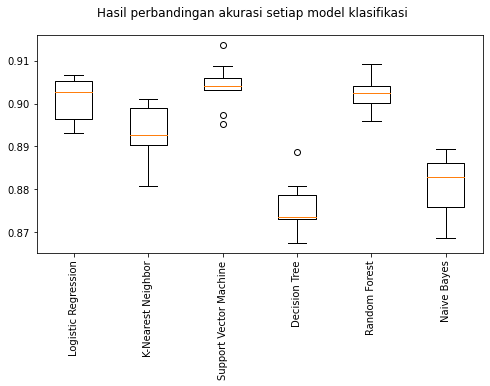

In [61]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

### OVERALL ANALISIS HASIL AKURASI SETIAP MODEL ML
>1. **Model SVM memberikan hasil paling akurat dengan hasil berikut: mean accuracy = 0.9043394055641109  std accuracy = 0.004635357795593934,** disusul secara tipis oleh random forest (mean accuracy = 0.9021886514423111  std accuracy = 0.0032858840062045393) dan Logistic regression (mean accuracy = 0.9012524276655492  std accuracy = 0.005067816438541438)


>2. Decision tree dan Naive Bayes memberikan akurasi paling rendah

>3. Hasil dari Akurasi bisa lebih baik dengan mengubah rasio data set training lebih besar, saat ini yang digunakan adalah rasio 70 % training 30 % test


## CONFUSION MATRIX SVM

In [62]:
# inisialisasi model SVM dengan default parameter
svm = SVC()

# fit model into training data
svm.fit(X_train_pca,y_train)

# get y prediction
y_pred = svm.predict(X_test_pca)

In [63]:
# print results
print("SVM Recall score = ", metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

SVM Recall score =  0.32901367890568756
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.66      0.33      0.44      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.65      0.69     12357
weighted avg       0.89      0.91      0.89     12357

[[10737   231]
 [  932   457]]


### ANALISIS HASIL CONFUSION MATRIX SVM

1. Dari hasil Confusion Matrix, didapatkan nilai True Negative (TN)= 10737, True Positive (TP) = 457, False Positive (FP) = 231 dan False Negative (FN) = 932


2. Meskipun dari keenam model mean akurasi dari SVM paling tinggi, nilai dari FN masih lebih besar dari TP